## **Exploratory data science on Titanic movie subtitle file**

In [1]:
!pip install pysrt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysrt: filename=pysrt-1.1.2-py3-none-any.whl size=13443 sha256=57173bbb3e55814e3a4104848883dc7c7b805dfe2184406564ed96c4facdf36d
  Stored in directory: /root/.cache/pip/wheels/30/7f/e8/55de9a9b07302d9e7fe47c27910e3bea0c48536153e74bd7e6
Successfully built pysrt


In [2]:
import pysrt
subs = pysrt.open("/content/titanic_subtitles.srt")

for sub in subs:
    print(sub.text)
    print()


13 meters. You should see it.

Okay, take her up and over the bow rail.

Okay, Mir-2, we're going over the bow.
Stay with us.

Okay, quiet. We're rolling.

Seeing her coming out of the darkness
like a ghost ship ...

still gets me every time.

To see the sad ruin of the great ship,
sitting here ...

where she landed at 2:30 in the morning
of April 15, 1912 ...

after her long fall ...

from the world above.

You're so full of shit, boss.

Dive 6.

Here we are again on the deck of Titanic.

2½ miles down.

3,821 meters.

The pressure outside
is 3½ tons per square inch.

These windows are 9 inches thick
and if they go ...

it's sayonara in 2 microseconds.

All right, enough of that bullshit.

Just put her down on the roof
of the officers' quarters like yesterday.

Sure.

Okay, Mir-2, we're landing
right over the Grand Staircase.

You guys set to launch?

Yeah, Brock, launching Dunkin now.
Go, Charlie.

- All right, tether out.
- Tether out.

Okay, Brock,
we're dropping down along the hul

In [3]:
import pandas as pd
import pysrt

# Load the subtitles using pysrt (update the path to where your SRT file is stored)
subs = pysrt.open("titanic_subtitles.srt")

# Create a DataFrame from the subtitles
data = {
    'start_seconds': [sub.start.ordinal / 1000 for sub in subs],
    'end_seconds': [sub.end.ordinal / 1000 for sub in subs],
    'duration_seconds': [(sub.end.ordinal - sub.start.ordinal) / 1000 for sub in subs],
    'text': [sub.text for sub in subs],
    'text_length': [len(sub.text) for sub in subs]
}

df_subs = pd.DataFrame(data)



In [4]:
df_subs.head()

,start_seconds,end_seconds,duration_seconds,text,text_length
0,110.903,113.019,2.116,13 meters. You should see it.,29
1,125.740,128.051,2.311,"Okay, take her up and over the bow rail.",40
2,129.498,132.699,3.201,"Okay, Mir-2, we're going over the bow.\nStay w...",52
3,165.581,167.572,1.991,"Okay, quiet. We're rolling.",27
4,168.216,171.577,3.361,Seeing her coming out of the darkness\nlike a ...,59


# **Basic Descriptive Analysis**

Here, we'll focus on understanding the overall structure of the subtitles and analyzing various characteristics like their duration, frequency of dialogue lines, and the length of text in each subtitle. This type of analysis will give you insights into the pacing of the dialogue and other aspects that could influence the viewer's experience.

**Summary Statistics** : Get a basic statistical overview of the subtitles, which includes counting subtitles, calculating average and median durations, and text lengths.

In [5]:
# Display basic statistics of the DataFrame
summary_stats = df_subs.describe()
print(summary_stats[['duration_seconds', 'text_length']])


       duration_seconds  text_length
count       2046.000000  2046.000000
mean           2.202808    31.935484
std            0.908880    17.777702
min            0.989000     3.000000
25%            1.558000    18.000000
50%            2.070000    30.000000
75%            2.673000    44.000000
max           10.009000    84.000000


**Analyzing Duration** : We can analyze the duration subtitles appear on screen to see if there are any outliers or general trends.

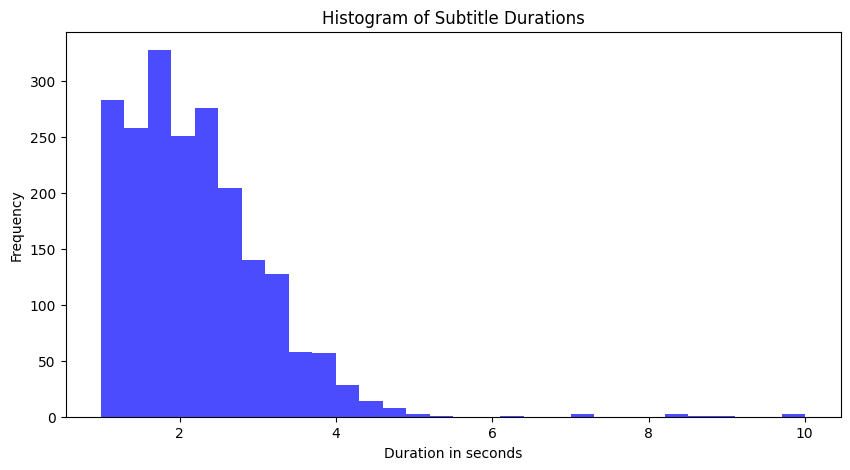

In [6]:
import matplotlib.pyplot as plt

# Histogram of subtitle durations
plt.figure(figsize=(10, 5))
plt.hist(df_subs['duration_seconds'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Subtitle Durations')
plt.xlabel('Duration in seconds')
plt.ylabel('Frequency')
plt.show()


 **Text Length Analysis**:
Understanding the length of the text can help identify if there are any particularly verbose or succinct parts.

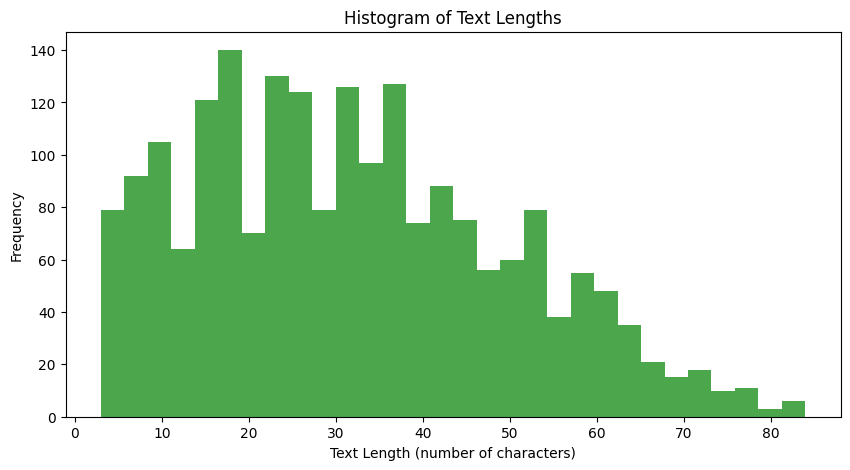

In [7]:
# Histogram of text length
plt.figure(figsize=(10, 5))
plt.hist(df_subs['text_length'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.show()


**Correlation Analysis**:
Check if there's any correlation between the duration subtitles are displayed and the length of the text.

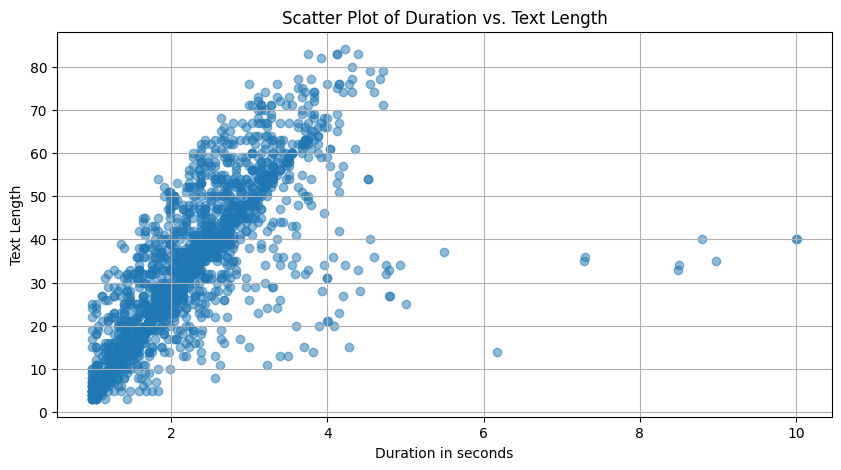

In [8]:
# Scatter plot to show the relationship between duration and text length
plt.figure(figsize=(10, 5))
plt.scatter(df_subs['duration_seconds'], df_subs['text_length'], alpha=0.5)
plt.title('Scatter Plot of Duration vs. Text Length')
plt.xlabel('Duration in seconds')
plt.ylabel('Text Length')
plt.grid(True)
plt.show()


## **Text Analysis**

**Step 1: Text Preprocessing**:First, we clean and prepare the text for analysis. This typically involves removing any formatting, non-alphanumeric characters, and potentially stopwords (commonly used words like "and", "the", etc., that might not add significant meaning in analysis).

In [9]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove subtitle formatting tags if present
    text = re.sub(r'<[^>]+>', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df_subs['cleaned_text'] = df_subs['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Step 2: Word Frequency Analysis**:
Analyzing the most common words can give insights into the key themes or topics of the dialogue.

In [10]:
from collections import Counter

# Flatten all texts into a single list
all_words = ' '.join(df_subs['cleaned_text']).split()

# Count word frequencies
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(20)
print("Most common words:", most_common_words)


Most common words: [('come', 112), ('go', 110), ('right', 101), ('rose', 88), ('back', 84), ('jack', 78), ('get', 74), ('im', 68), ('sir', 62), ('dont', 61), ('see', 52), ('know', 52), ('like', 50), ('mr', 50), ('youre', 46), ('thats', 45), ('well', 43), ('good', 42), ('please', 42), ('yes', 38)]


**Step 3: Word Cloud**:
A word cloud visually represents the frequency of various words. Larger sizes indicate higher frequencies.

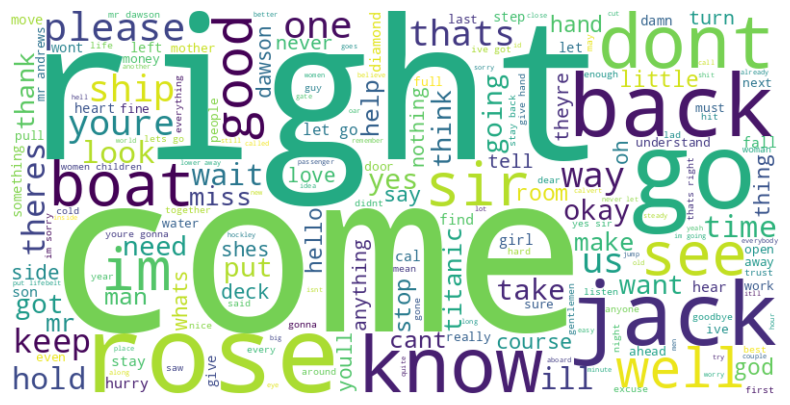

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Step 4: N-gram Analysis**:
N-grams are combinations of adjacent words in a given text, used to predict the next word in a sequence. Analyzing n-grams can help us understand common phrases or specific linguistic structures in the dialogues.

In [12]:
from nltk import ngrams
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Generate bigrams (you can adjust this to trigrams or higher)
bigrams = ngrams(word_tokenize(' '.join(df_subs['cleaned_text'])), 2)
bigram_freq = Counter(bigrams)

# Most common bigrams
most_common_bigrams = bigram_freq.most_common(20)
print("Most common bigrams:", most_common_bigrams)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Most common bigrams: [(('gon', 'na'), 20), (('let', 'go'), 14), (('come', 'come'), 12), (('mr', 'andrews'), 11), (('get', 'back'), 11), (('women', 'children'), 11), (('go', 'back'), 10), (('yes', 'sir'), 10), (('im', 'sorry'), 10), (('ive', 'got'), 10), (('stay', 'back'), 10), (('youre', 'gon'), 10), (('thats', 'right'), 9), (('lets', 'go'), 9), (('mr', 'dawson'), 9), (('get', 'boat'), 9), (('lower', 'away'), 9), (('give', 'hand'), 8), (('jack', 'jack'), 8), (('come', 'rose'), 8)]


In [13]:
from textblob import TextBlob

# Function to get the sentiment of text
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to each cleaned subtitle
df_subs['sentiment'] = df_subs['cleaned_text'].apply(get_sentiment)


**step 5: Visualization of Sentiments**:
Visualizing how sentiment changes throughout the movie can reveal the emotional arcs.

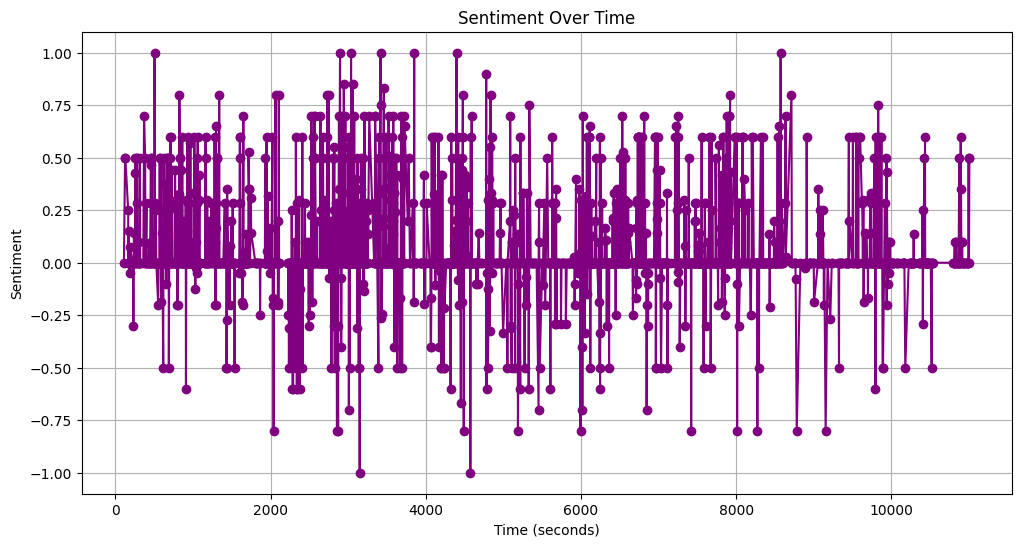

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df_subs['start_seconds'], df_subs['sentiment'], marker='o', linestyle='-', color='purple')
plt.title('Sentiment Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Sentiment')
plt.grid(True)
plt.show()


# **Sentiment Analysis**

let's dive into a detailed sentiment analysis of the subtitle data. Sentiment analysis involves determining the emotional tone behind a series of words, used to gain an understanding of the attitudes, opinions, and emotions expressed within an online mention. This can be particularly interesting for movie subtitles to analyze how sentiments evolve throughout the film.

**Step 1**: Choosing a Sentiment Analysis Tool
For English text, there are several tools available. Here are two popular ones:

**TextBlob**: Simple to use for basic sentiment analysis, providing both polarity (how positive or negative something is) and subjectivity (how subjective or objective a statement is).

**VADER**: Specifically attuned to sentiments expressed in social media, uses a combination of a lexicon and rule-based reasoning. It's very effective for texts with slangs, emoticons, and abbreviations.


**Step 2: Preprocessing Text**
As we have already cleaned the text (removed HTML tags, converted to lowercase, removed non-alphanumeric characters), we can proceed directly to applying sentiment analysis.



**Step 3: Analyzing Sentiment with TextBlob**
Here's how you can apply TextBlob to analyze the sentiment of each subtitle:

In [15]:
from textblob import TextBlob

# Function to get the sentiment of text
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 and 1

# Apply the function to each cleaned subtitle
df_subs['sentiment'] = df_subs['cleaned_text'].apply(get_sentiment)


**Step 4: Analyzing Sentiment with VADER**
If you choose VADER, you need to install the vaderSentiment library. Here’s how to use it:

In [16]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    vs = analyzer.polarity_scores(text)
    return vs['compound']  # Returns the compound score

# Apply the VADER sentiment analysis to each cleaned subtitle
df_subs['vader_sentiment'] = df_subs['cleaned_text'].apply(get_vader_sentiment)


**Step 5: Visualizing Sentiments Over Time**
To understand how the emotional tone changes throughout the movie, you can plot the sentiment scores against the subtitle timings:

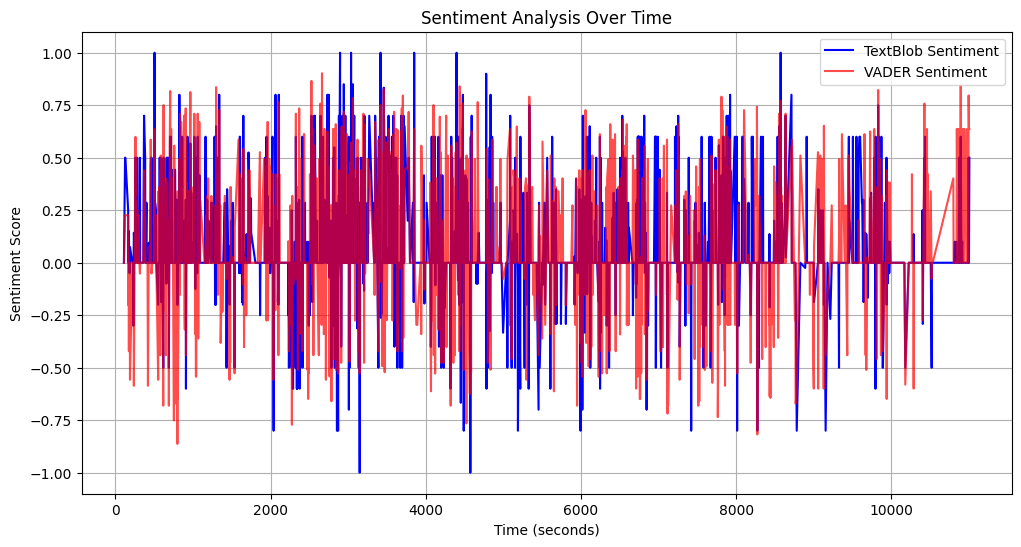

In [18]:
import matplotlib.pyplot as plt

# Plotting TextBlob Sentiment Over Time
plt.figure(figsize=(12, 6))
plt.plot(df_subs['start_seconds'], df_subs['sentiment'], label='TextBlob Sentiment', color='blue')
plt.plot(df_subs['start_seconds'], df_subs['vader_sentiment'], label='VADER Sentiment', color='red', alpha=0.7)
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()


**Step 6: Interpreting Results**

**Polarity Score**: A positive score indicates a positive sentiment, and a negative score indicates a negative sentiment. Look for trends, spikes, or drops to infer what parts of the movie are particularly emotional or neutral.

**Comparison**: Compare the sentiment trends obtained by TextBlob and VADER. Each tool may interpret the sentiments differently based on their internal mechanisms and sensitivity to certain expressions.

**Heatmap of Sentiment Distribution**

If you want to visualize the distribution of sentiments throughout the movie in a different way, a heatmap can be useful.



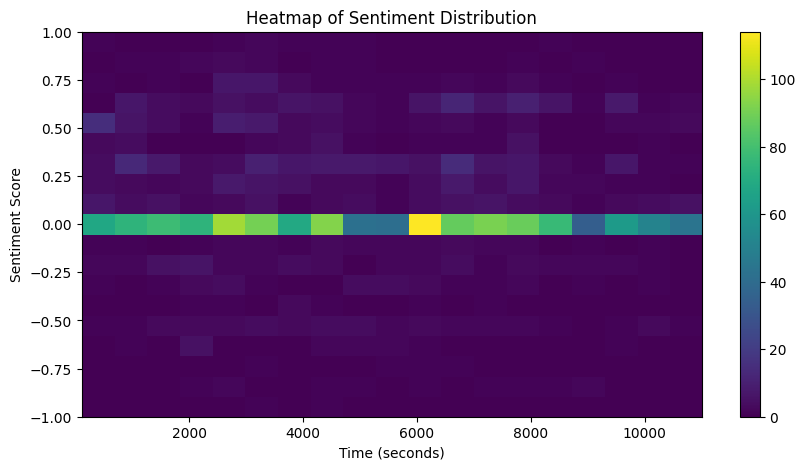

In [19]:
import numpy as np

# Assuming sentiments are normalized between -1 and 1
sentiment_bins = np.linspace(-1, 1, 20)
time_bins = np.linspace(df_subs['start_seconds'].min(), df_subs['start_seconds'].max(), 20)

heatmap, xedges, yedges = np.histogram2d(df_subs['start_seconds'], df_subs['sentiment'], bins=(time_bins, sentiment_bins))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10, 5))
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Heatmap of Sentiment Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Sentiment Score')
plt.show()


In [20]:
# prompt: export the df_subs file

df_subs.to_csv('df_subs.csv', index=False)


In [21]:
df_subs.head()

,start_seconds,end_seconds,duration_seconds,text,text_length,cleaned_text,sentiment,vader_sentiment
0,110.903,113.019,2.116,13 meters. You should see it.,29,13 meters see,0.00,0.0000
1,125.740,128.051,2.311,"Okay, take her up and over the bow rail.",40,okay take bow rail,0.50,0.2263
2,129.498,132.699,3.201,"Okay, Mir-2, we're going over the bow.\nStay w...",52,okay mir2 going bow stay us,0.50,0.2263
3,165.581,167.572,1.991,"Okay, quiet. We're rolling.",27,okay quiet rolling,0.25,0.2263
4,168.216,171.577,3.361,Seeing her coming out of the darkness\nlike a ...,59,seeing coming darkness like ghost ship,0.00,-0.2023


## **Timeline Analysis**

Timeline analysis is a powerful method to visualize the occurrence of specific words or phrases over the course of a movie. This can help to identify key dialogue moments that relate to major plot points, themes, or emotional peaks. Here's how you can perform a detailed timeline analysis using the subtitle data:

**Step 1**: Define Keywords or Phrases
First, you need to decide on the keywords or phrases you want to track. These could be central themes, character names, or any specific terms relevant to the movie's plot or analysis goals.

**Step 2**: Preparing the Data
Ensure your subtitle data includes time codes and cleaned text. If you don't already have start times in seconds, you should convert them to a numerical format that is easy to work with. As in our project, we already did that.

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)
    # Tokenization
    words = text.split()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Assuming df_subs['text'] is the column with subtitle texts
df_subs['processed_text'] = df_subs['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Step 3:** Find Occurrences of Keywords or Phrases
Search through the text for each subtitle to find if the keyword or phrase appears, and record the time if it does.

In [25]:
!pip install pandas

In [26]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [34]:
keywords = [ 'love',  'rose', 'jack', 'ship', 'titanic', 'ice',  'heart',  'rich', 'cold', 'dance']  # Example keywords

results = []

for keyword in keywords:
    occurrences = df_subs[df_subs['processed_text'].str.contains(keyword, na=False)]
    for _, row in occurrences.iterrows():
        results.append({'keyword': keyword, 'time': row['start_seconds']})

# Convert list of dictionaries to a DataFrame
keyword_timeline = pd.DataFrame(results)

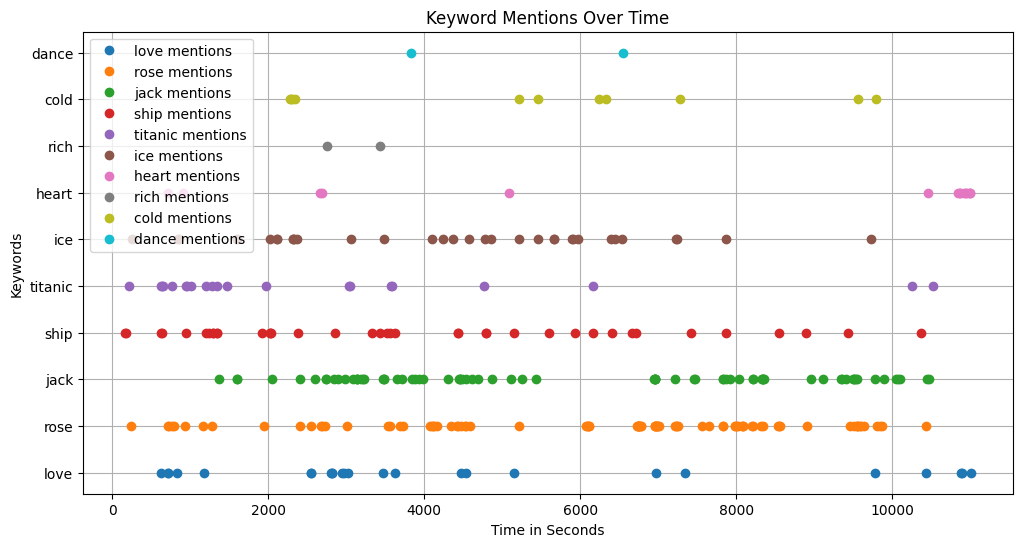

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for keyword in keywords:
    times = keyword_timeline[keyword_timeline['keyword'] == keyword]['time']
    plt.plot(times, [keyword] * len(times), 'o', label=f'{keyword} mentions')

plt.title('Keyword Mentions Over Time')
plt.xlabel('Time in Seconds')
plt.ylabel('Keywords')
plt.yticks(keywords)  # Ensure only keywords are on y-axis
plt.legend()
plt.grid(True)
plt.show()


In [36]:
import plotly.express as px

fig = px.scatter(keyword_timeline, x='time', y='keyword', color='keyword', labels={
                 'time': 'Time in Seconds',
                 'keyword': 'Keywords'
             },
             title='Interactive Plot of Keyword Mentions Over Time')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


**Step 5: Analyze the Results**
This visualization allows you to see the distribution and frequency of key terms throughout the movie. Observing clusters of mentions or significant gaps can provide insights into how the movie develops its themes or focuses on certain aspects at different points.